In [18]:
import tweepy
import re
import pickle

In [19]:
from tweepy import OAuthHandler  # Performs authentication job

In [20]:
from config import consumer_key, consumer_secret, access_secret, access_token

In [65]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

In [93]:
args = ['facebook']
api = tweepy.API(auth, timeout=10)

In [94]:
#Fetching real time tweeets
list_tweets = []

query = args[0]

if len(args) > 0:
    for status in tweepy.Cursor(api.search, q=query+" -filter:retweets", lang="en", result_type='recent').items(100):
        list_tweets.append(status.text)


In [95]:
list_tweets

[u'Hope to see you for some v nice new music by @sylvlim, @lararoseagar, Linda Catlin Smith, J\xfcrg Frey and myself this\u2026 https://t.co/2Z4kNRcK83',
 u"\U0001f340\U0001f33e\u2618Thank God that we can gather in God's love, no barriers and we love each other, Let's worship God with our heart\u2026 https://t.co/hVzBXTZsnr",
 u'Join us for coffee and chat at 10am  today at Gatehouse Coffee Roasters.  Todays History Cafe theme is Renfrewshire\u2026 https://t.co/5Jk5pzEqRS',
 u"We've had Boris bridges, bikes and buses and, now, here comes the bungs! https://t.co/8H3SoavdB3",
 u'Our 1st PTA Meeting. Thank you Parents \U0001f49b\nGrade 6 - Howlite\nS.Y. 2019-2020 \u2014 at Caruhatan West Elementary School https://t.co/GZ9dIIzsTN',
 u'Building a track...\nGuitar, Bass, sampler and voice...\nSimple...\n\nA year from now\n\nFacebook and soundcloud: /deejay\u2026 https://t.co/sZCeow4SLX',
 u'A5 Memo Notebook Bottle\n\nhttps://t.co/OnhCSxZyHp https://t.co/rkE26NdXI4 https://t.co/S7BReB9b6y',
 

In [96]:
#Loading TD-IDF Model and Classifier

with open('tfidfmode.pickle', 'rb') as f:
    vectorizer = pickle.load(f)
    
with open('classifier.pickle', 'rb') as f:
    clf = pickle.load(f)

In [97]:
clf.predict(vectorizer.transform(['You are a nice person man, have a good life']))

array([1])

In [98]:
total_pos = 0
total_neg = 0
#Preprocessing the tweets
for tweet in list_tweets:
    tweet = re.sub(r"^https://t.co/[a-zA-Z0-9]*\s", " ",tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*\s", " ",tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*$", " ",tweet)
    tweet = tweet.lower()
    tweet = re.sub(r"that's", "that is", tweet)
    tweet = re.sub(r"there's", "there is", tweet)
    tweet = re.sub(r"what's", "what is", tweet)
    tweet = re.sub(r"where's", "where is", tweet)
    tweet = re.sub(r"it's", "it is", tweet)
    tweet = re.sub(r"who's", "who is", tweet)
    tweet = re.sub(r"i'm", "i am", tweet)
    tweet = re.sub(r"she's", "she is", tweet)
    tweet = re.sub(r"he's", "he is", tweet)
    tweet = re.sub(r"they're", "they are", tweet)
    tweet = re.sub(r"who're", "who are", tweet)
    tweet = re.sub(r"ain't", "am not", tweet)
    tweet = re.sub(r"wouldn't", "would not", tweet)
    tweet = re.sub(r"shouldn't", "should not", tweet)
    tweet = re.sub(r"can't", "can not", tweet)
    tweet = re.sub(r"couldn't", "could not", tweet)
    tweet = re.sub(r"won't", "will not", tweet)
    tweet = re.sub(r"\W", " ", tweet)
    tweet = re.sub(r"\d", " ", tweet)
    tweet = re.sub(r"s+[a-z]\s+", " ", tweet)
    tweet = re.sub(r"\s+[a-z]$", " ", tweet)
    tweet = re.sub(r"^[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+", " ", tweet)    
    sent = clf.predict(vectorizer.transform([tweet]).toarray())
    if sent[0] == 1:
        total_pos += 1
    else:
        total_neg += 1

In [99]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [100]:
objects = ['Positive', 'Negative']
y_pos = np.arange(len(objects))

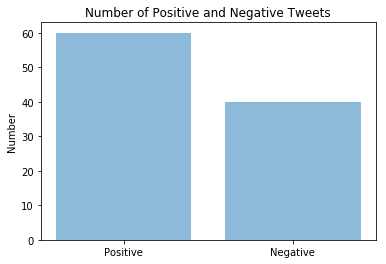

In [101]:
plt.bar(y_pos, [total_pos, total_neg], alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number')
plt.title('Number of Positive and Negative Tweets')
plt.show()